In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
data = df.sample(frac=0.85, random_state=None).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)
print("Data for Modeling :" + str(data.shape))
print("Unseen Data for Prediction :" + str(data_unseen.shape))

Data for Modeling :(8500, 14)
Unseen Data for Prediction :(1500, 14)


# AutoML
# Pycaret
# FBpropthet
# DARTS

In [12]:
!pip install pycaret

In [13]:
from pycaret.classification import *

In [14]:
exp_clf101 = setup(data=data, target='Exited', session_id=125)

,Description,Value
0,Session id,125
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(8500, 14)"
4,Transformed data shape,"(8500, 16)"
5,Transformed train set shape,"(5950, 16)"
6,Transformed test set shape,"(2550, 16)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,3


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8131,0.7662,0.3029,0.5742,0.3958,0.2977,0.3194,1.0350
gbc,Gradient Boosting Classifier,0.8124,0.7071,0.3485,0.5599,0.4290,0.3241,0.3374,1.4090
rf,Random Forest Classifier,0.8103,0.7481,0.3319,0.5530,0.4145,0.3097,0.3242,1.2610
lightgbm,Light Gradient Boosting Machine,0.8059,0.6787,0.3709,0.5298,0.4358,0.3231,0.3308,0.7520
ada,Ada Boost Classifier,0.8010,0.6940,0.3601,0.5156,0.4224,0.3070,0.3150,0.7870
xgboost,Extreme Gradient Boosting,0.8002,0.6980,0.3659,0.5101,0.4256,0.3087,0.3152,1.1370
lr,Logistic Regression,0.7975,0.5850,0.0000,0.0000,0.0000,0.0000,0.0000,0.7540
dummy,Dummy Classifier,0.7975,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2600
nb,Naive Bayes,0.7891,0.7463,0.0938,0.4127,0.1519,0.0832,0.1138,0.2360
svm,SVM - Linear Kernel,0.7726,0.0000,0.0686,0.2149,0.0507,0.0182,0.0354,0.5200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=125, verbose=0, warm_start=False)

In [16]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8118,0.7553,0.3250,0.5571,0.4105,0.3076,0.3235
1,0.8168,0.7421,0.3333,0.5797,0.4233,0.3237,0.3412
2,0.8101,0.7824,0.2583,0.5636,0.3543,0.2605,0.2879
3,0.8218,0.7549,0.3500,0.6000,0.4421,0.3447,0.3625
4,0.8151,0.7475,0.3000,0.5806,0.3956,0.2993,0.3221
5,0.8067,0.7567,0.3140,0.5429,0.3979,0.2924,0.3080
6,0.8252,0.7825,0.3140,0.6441,0.4222,0.3333,0.3633
7,0.8000,0.7740,0.2893,0.5147,0.3704,0.2624,0.2779
8,0.8084,0.7962,0.2727,0.5593,0.3667,0.2692,0.2934


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# HyperParameter Tuning
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7933,0.6616,0.2417,0.4754,0.3204,0.2135,0.2306
1,0.8185,0.6651,0.3250,0.5909,0.4194,0.3224,0.3426
2,0.7950,0.7228,0.2583,0.4844,0.3370,0.2288,0.2446
3,0.8034,0.7025,0.2667,0.5246,0.3536,0.2519,0.2720
4,0.7933,0.6498,0.2167,0.4727,0.2971,0.1951,0.2156
5,0.8050,0.6685,0.2975,0.5373,0.3830,0.2784,0.2956
6,0.8151,0.7079,0.2810,0.5965,0.3820,0.2895,0.3179
7,0.7950,0.6935,0.3058,0.4933,0.3776,0.2628,0.2736
8,0.8067,0.6830,0.2314,0.5600,0.3275,0.2367,0.2684


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


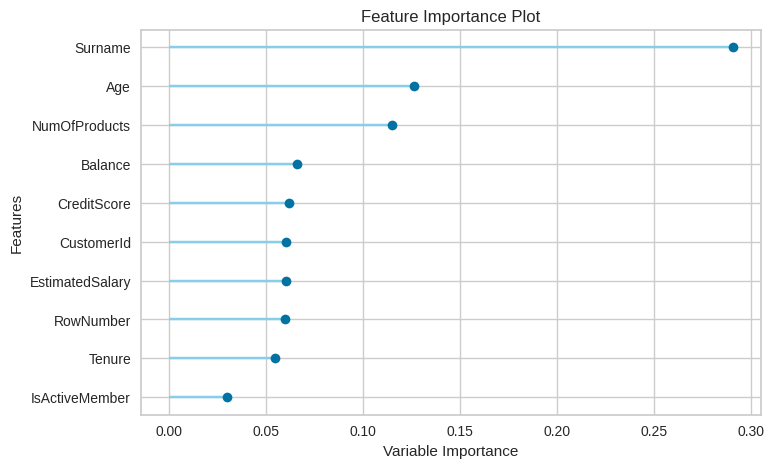

In [18]:
plot_model(tuned_et, plot='feature')

In [19]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(tuned_et)

In [ ]:
unseen_prediction = predict_model(tuned_et, data=data_unseen)
unseen_prediction